# **Load datasets**

In [1]:
!gdown 1-ytPfHfXG1EHDws8Jv9SO6AFAc0WnlET
!gdown 18pSC4fqR5RbHVbg7euJs4ICk0r7_kTx2
!gdown 1cWaIdSgzGTYQmFsmgMH0yllVGdTvcxCx

Downloading...
From: https://drive.google.com/uc?id=1-ytPfHfXG1EHDws8Jv9SO6AFAc0WnlET
To: /content/beta1_0.zip
100% 267k/267k [00:00<00:00, 81.8MB/s]
Downloading...
From: https://drive.google.com/uc?id=18pSC4fqR5RbHVbg7euJs4ICk0r7_kTx2
To: /content/beta0_125.zip
100% 278k/278k [00:00<00:00, 41.3MB/s]
Downloading...
From: https://drive.google.com/uc?id=1cWaIdSgzGTYQmFsmgMH0yllVGdTvcxCx
To: /content/beta0_6.zip
100% 269k/269k [00:00<00:00, 75.7MB/s]


In [2]:
!unzip 'beta0_125.zip'
!unzip 'beta0_6.zip'
!unzip 'beta1_0.zip'

Archive:  beta0_125.zip
  inflating: beta0_125_n100.csv      
  inflating: beta0_125_n200.csv      
  inflating: beta0_125_n25.csv       
  inflating: beta0_125_n400.csv      
  inflating: beta0_125_n50.csv       
Archive:  beta0_6.zip
  inflating: beta0_6_n100.csv        
  inflating: beta0_6_n200.csv        
  inflating: beta0_6_n25.csv         
  inflating: beta0_6_n400.csv        
  inflating: beta0_6_n50.csv         
Archive:  beta1_0.zip
  inflating: beta1_0_n100.csv        
  inflating: beta1_0_n200.csv        
  inflating: beta1_0_n25.csv         
  inflating: beta1_0_n400.csv        
  inflating: beta1_0_n50.csv         


In [3]:
!gdown 1kTwEZ937PJ8tQOL8BmxYAtQwCXyTYtzp
!unzip 'uniform_data.zip'

Downloading...
From: https://drive.google.com/uc?id=1kTwEZ937PJ8tQOL8BmxYAtQwCXyTYtzp
To: /content/uniform_data.zip
100% 5.85M/5.85M [00:00<00:00, 101MB/s]
Archive:  uniform_data.zip
  inflating: uniform_data_100.npy    
  inflating: uniform_data_200.npy    
  inflating: uniform_data_25.npy     
  inflating: uniform_data_400.npy    
  inflating: uniform_data_50.npy     


# **Imports**

In [4]:
import pandas as pd
import pymc as pm
import numpy as np
import arviz as az
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import copy

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from tqdm.notebook import tqdm, trange
from pytensor.tensor import TensorVariable, log, exp

seed = 42
az.style.use("arviz-docgrid")
sns.set_theme(style='whitegrid')

# **Simulations**

In [5]:
#@title Function to create statistics
def create_statistics(beta: float, sizes: np.ndarray):

  # Dicionários para armazenar estatísticas das distribuições Gamma e Uniforme.
  gam_statistics ={'size': [], 'mean': [], 'var': [],
                   'bias': [], 'MSE': [], 'RMSE': [], 'PC': []}

  uni_statistics ={'size': [], 'mean': [], 'var': [],
                   'bias': [], 'MSE': [], 'RMSE': [], 'PC': []}


  # Itera sobre os diferentes tamanhos de amostra.
  for size in sizes:
    # Cria uma chave baseada no valor de beta para encontrar o arquivo CSV correspondente.
    if beta < 1:
      key = '0_' + str(beta).split('.')[1]

    else:
      spt = str(beta).split('.')
      key = spt[0] + '_' + spt[1]

    # Lê os dados do arquivo CSV gerado.
    df = pd.read_csv(f'beta{key}_n{size}.csv')

    # Estatísticas para as distribuições
    gam_data = df['Gamma'].to_numpy()

    gam_statistics['size'].append(size)
    gam_statistics['mean'].append(np.mean(gam_data))
    gam_statistics['var'].append(np.var(gam_data))
    gam_statistics['bias'].append(np.mean(gam_data) - beta)
    MSE = np.sum((beta - gam_data)**2) / len(gam_data)
    gam_statistics['MSE'].append(MSE)
    gam_statistics['RMSE'].append(np.sqrt(MSE))

    cout = 0
    for lower, upper in df[['Lower-Gamma', 'Upper-Gamma']].to_numpy():
      cout += 1 if lower < beta < upper else 0
    gam_statistics['PC'].append(cout / gam_data.shape[0])


    uni_data = df['Uniform'].to_numpy()

    uni_statistics['size'].append(size)
    uni_statistics['mean'].append(np.mean(uni_data))
    uni_statistics['var'].append(np.var(uni_data))
    uni_statistics['bias'].append(np.mean(uni_data) - beta)
    MSE = np.sum((beta- uni_data)**2) / len(uni_data)
    uni_statistics['MSE'].append(MSE)
    uni_statistics['RMSE'].append(np.sqrt(MSE))

    cout = 0
    for lower, upper in df[['Lower-Uniform', 'Upper-Uniform']].to_numpy():
      cout += 1 if lower < beta < upper else 0
    uni_statistics['PC'].append(cout / uni_data.shape[0])

  # Retorna DataFrames contendo as estatísticas para as distribuições Gamma e Uniforme.
  return pd.DataFrame(gam_statistics), pd.DataFrame(uni_statistics)

In [6]:
sizes = [25, 50, 100, 200, 400]
betas = [.125, .6, 1.]

for beta in betas:
  gam_frame, uni_frame = create_statistics(beta, sizes)
  print(f'Beta :: {beta}')
  print(f'Gamma Prior\n\ta :: {1}\n\tb :: {1e-3}\n')
  print(gam_frame)
  print('=' * 75)
  print(f'Uniform Prior\n\ta :: {0}\n\tb :: {1e+3}\n')
  print(uni_frame)
  print('=' * 75)
  print('\n\n')


Beta :: 0.125
Gamma Prior
	a :: 1
	b :: 0.001

   size      mean       var      bias       MSE      RMSE     PC
0    25  0.255756  0.028168  0.130756  0.045265  0.212756  0.929
1    50  0.195230  0.013095  0.070230  0.018027  0.134266  0.937
2   100  0.153991  0.005144  0.028991  0.005985  0.077362  0.953
3   200  0.136739  0.002824  0.011739  0.002961  0.054419  0.936
4   400  0.128950  0.001574  0.003950  0.001590  0.039873  0.927
Uniform Prior
	a :: 0
	b :: 1000.0

   size      mean       var      bias       MSE      RMSE     PC
0    25  0.255122  0.028153  0.130122  0.045085  0.212332  0.931
1    50  0.194912  0.013087  0.069912  0.017974  0.134069  0.939
2   100  0.153862  0.005150  0.028862  0.005983  0.077350  0.949
3   200  0.136699  0.002827  0.011699  0.002964  0.054441  0.934
4   400  0.128953  0.001574  0.003953  0.001590  0.039874  0.928



Beta :: 0.6
Gamma Prior
	a :: 1
	b :: 0.001

   size      mean       var      bias       MSE      RMSE     PC
0    25  0.666222  0.066

# **Using article data**

In [7]:
#@title Util Functions
def logp(x: TensorVariable, beta: TensorVariable) -> TensorVariable:
    return beta/x - (1/beta) * (exp(beta/x) - 1) - 2*log(x)


def ppf(q: float, beta: float) -> float:
    return np.divide( beta, np.log(1 - beta * np.log(q)) )

In [8]:
sample = np.array([ 18.83 , 20.8 , 21.657 , 23.03 , 23.23 , 24.05 , 24.321 , 25.5 , 25.52 , 25.8 , 26.69 ,
                    26.77 , 26.78 , 27.05 , 27.67 , 29.9 , 31.11 , 33.2 , 33.73 , 33.76 , 33.89 , 34.76 ,
                    35.75 , 35.91 , 36.98 , 37.08 , 37.09 , 39.58 , 44.045 , 45.29 , 45.381 ])

## **Model 1**

/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)
/usr/local/lib/python3.10/dist-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,125.208,5.031,115.859,134.685,0.078,0.055,4224.0,4553.0,1.0


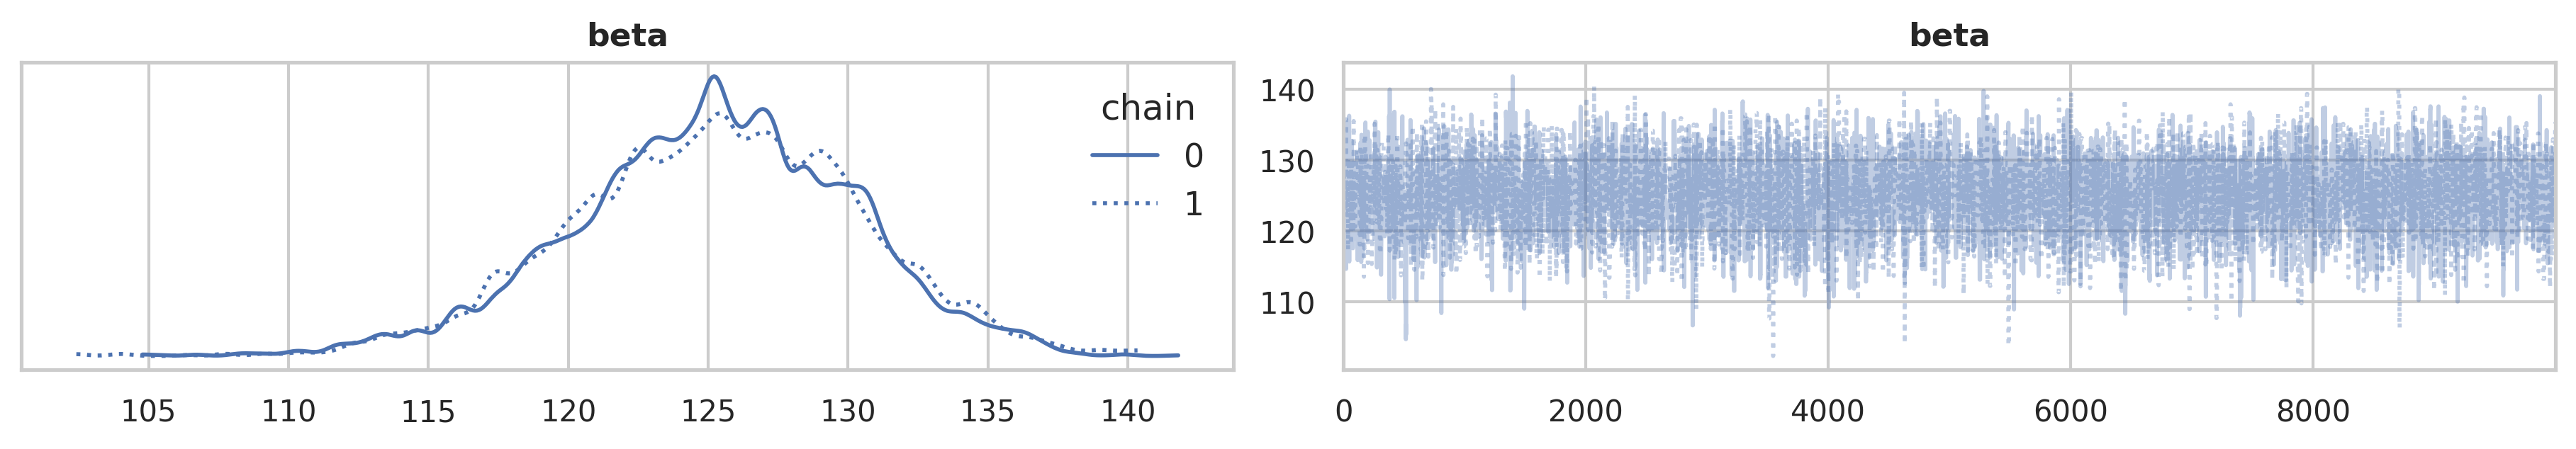

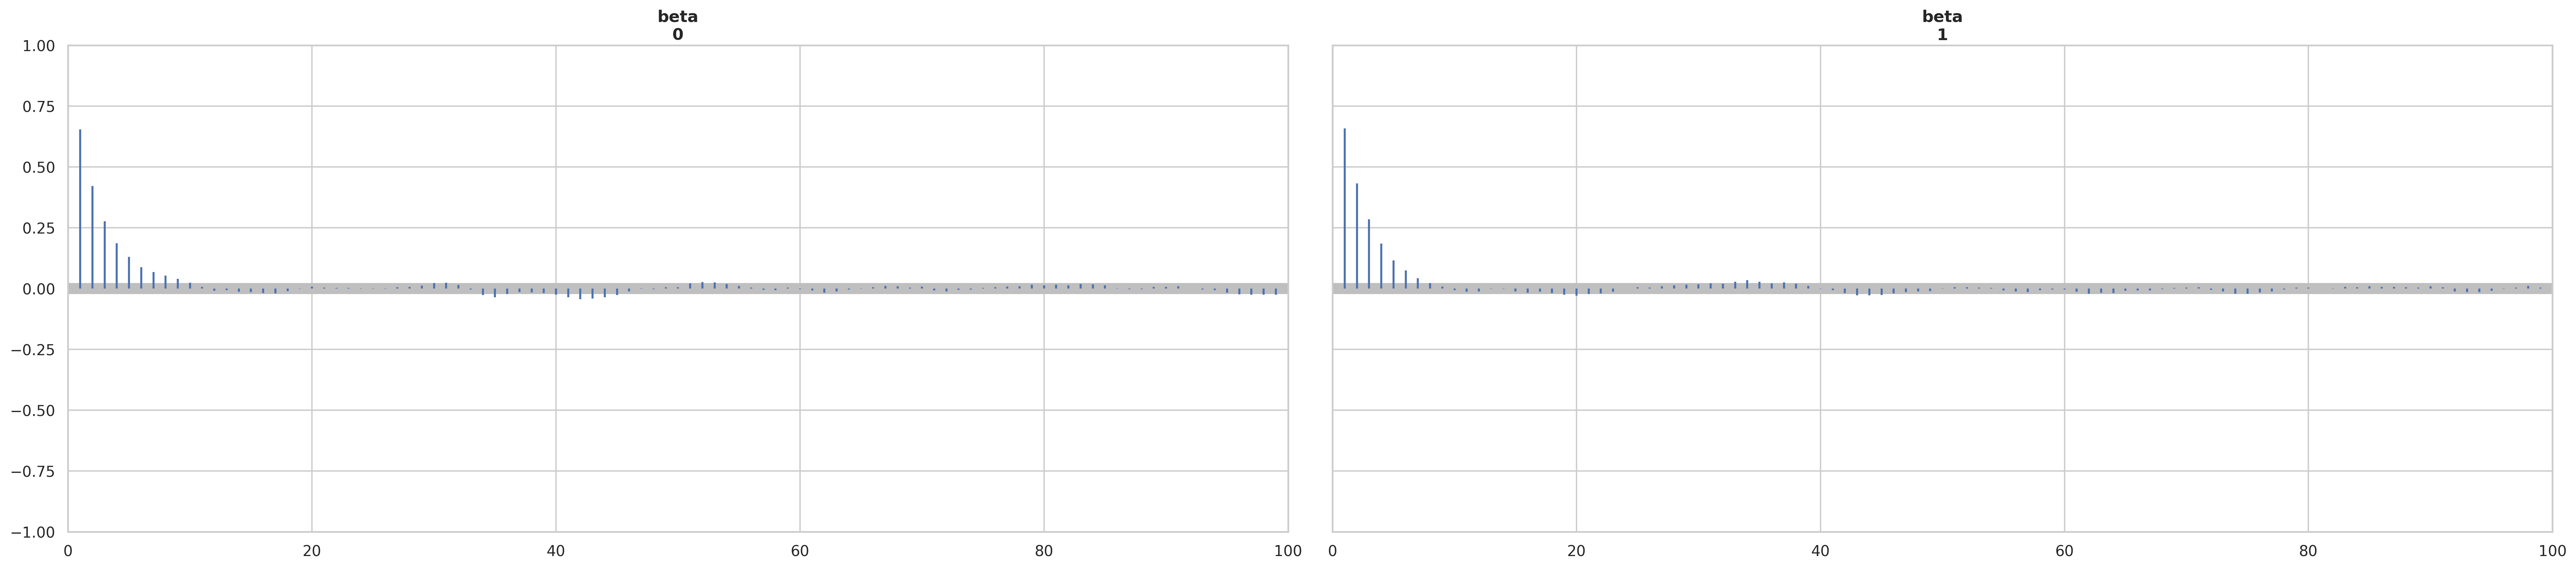

In [9]:
with pm.Model() as gamma_model:
    # Define a distribuição prior para o parâmetro beta como Gamma.
    beta = pm.Gamma('beta', 1, 0.001)

    # Define a distribuição customizada para os dados usando a função log-verossimilhança logp.
    data = pm.CustomDist('data', beta, logp=logp, observed=sample)

    # Configuração inicial para os valores de beta e dados.
    start = {'beta': 1e-2, 'data': 1e-2}

    # Define o passo do Metropolis para a amostragem.
    step = pm.Metropolis(step_scale=5)

    # Realiza a amostragem utilizando o Metropolis.
    gam_trace = pm.sample(10000, tune=10000, random_seed=seed, initvals=start, step=step, chains=2)

# Plota os traços e autocorrelações da cadeia de Markov gerada.
with gamma_model:
    az.plot_trace(gam_trace, legend=True)
    az.plot_autocorr(gam_trace)

# Sumariza as estatísticas da cadeia de Markov.
pm.summary(gam_trace)

## **Model 2**

,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
beta,125.147,5.035,115.455,134.27,0.083,0.059,3683.0,3981.0,1.0


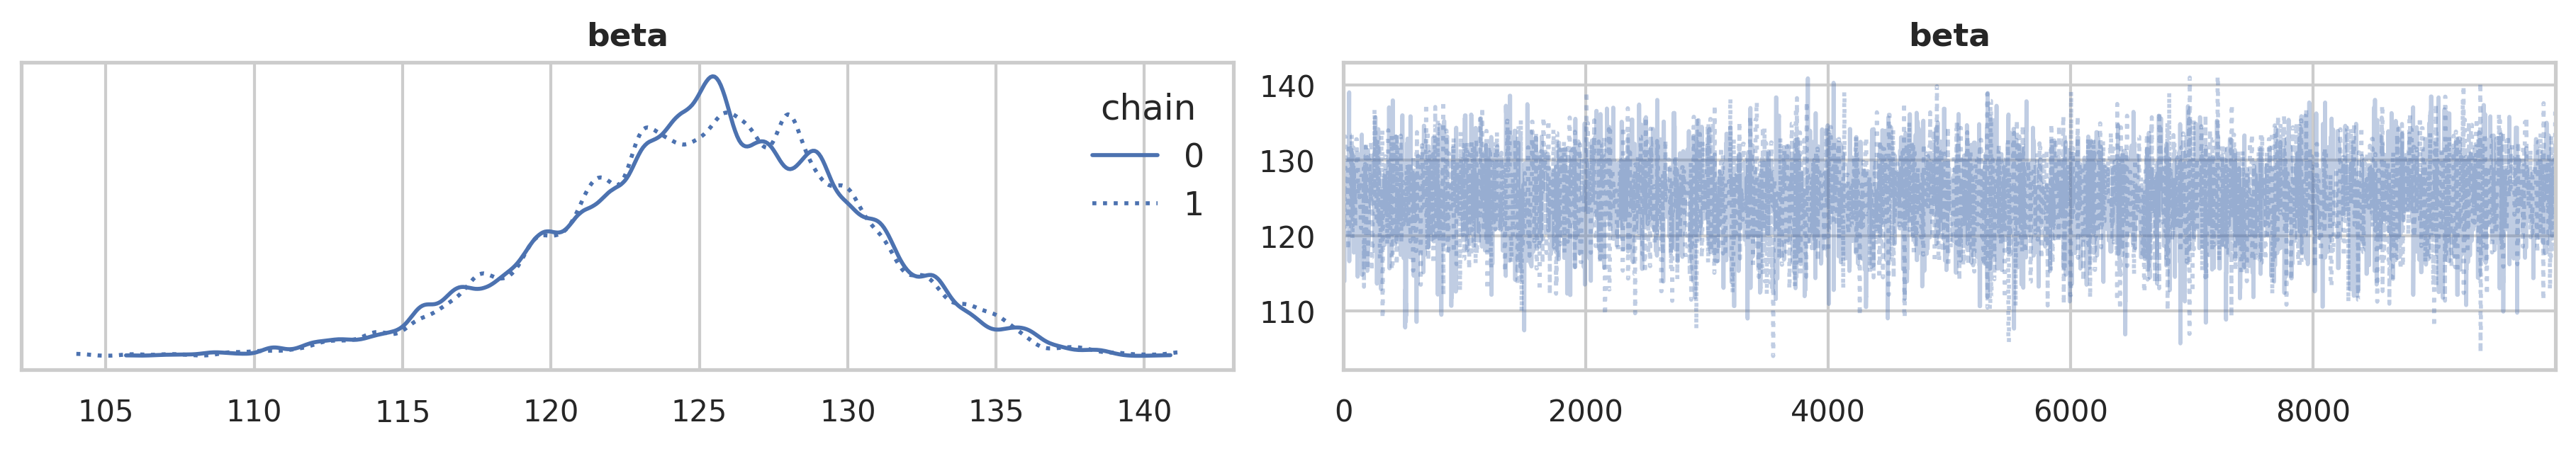

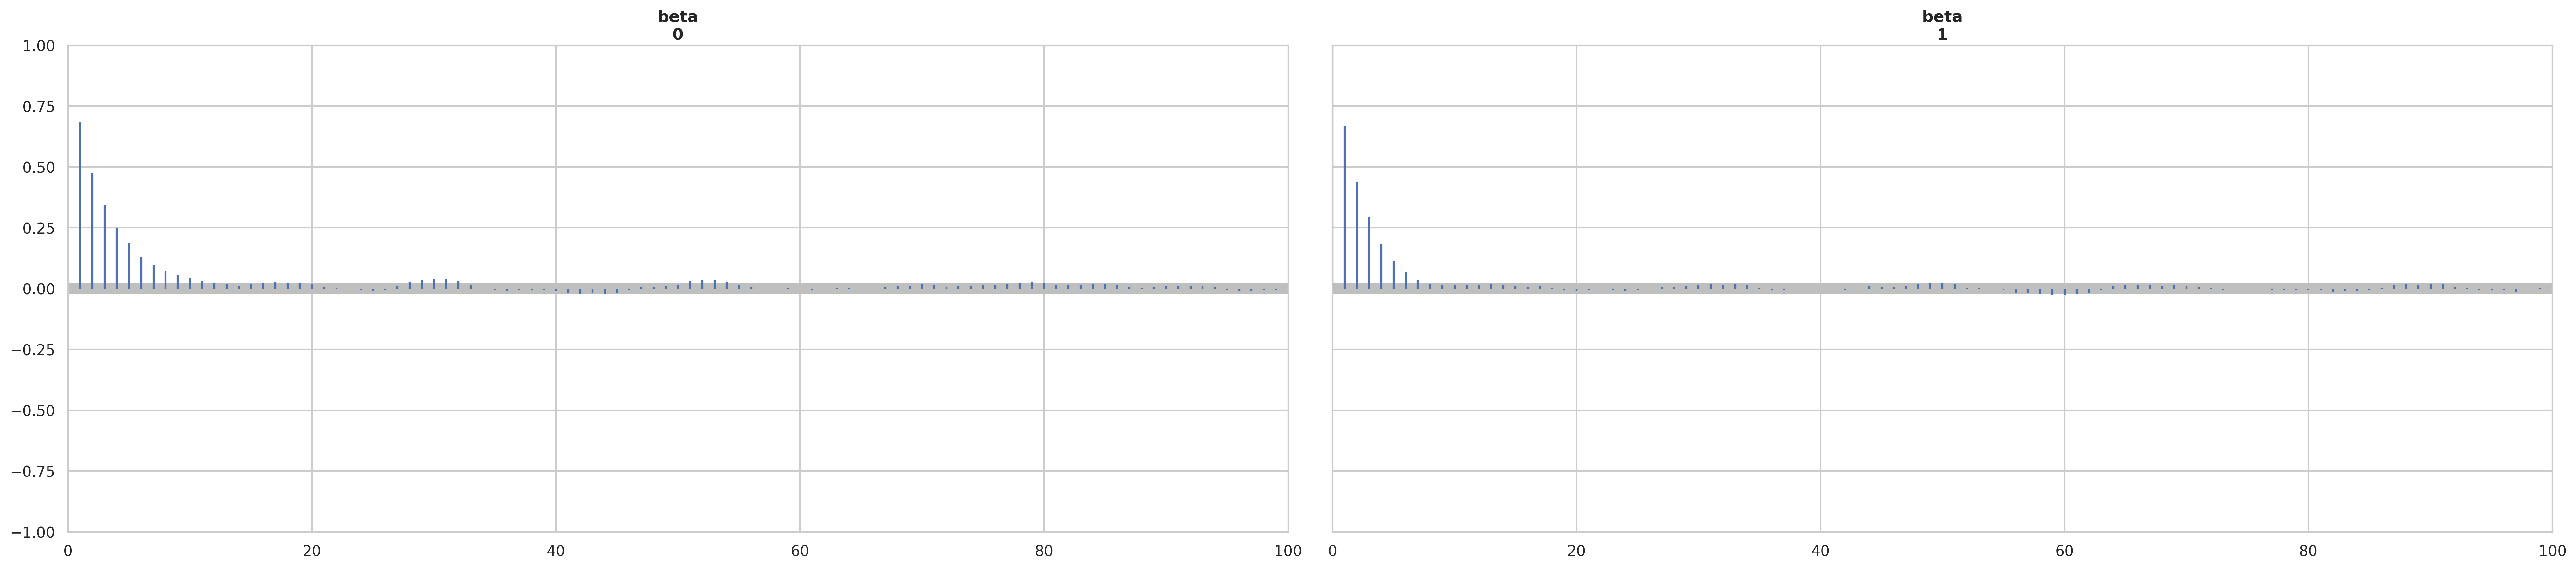

In [10]:
with pm.Model() as unif_model:
    beta = pm.Uniform('beta', 0, 1000)
    data = pm.CustomDist('data', beta, logp=logp, observed=sample)

    start = {'beta': 1e-2, 'data': 1e-2}
    step = pm.Metropolis(step_scale=5)
    unif_trace = pm.sample(10000, tune=10000, random_seed=seed, initvals=start, step=step, chains=2)

with unif_model:
    az.plot_trace(unif_trace, legend=True)
    az.plot_autocorr(unif_trace)
pm.summary(unif_trace)